<a href="https://colab.research.google.com/github/Ni7070/Genetic-ALgorithm/blob/master/knapsack_using_pygad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install pygad

     |████████████████████████████████| 53 kB 1.3 MB/s 


In [37]:
import pygad

In [38]:
import pandas as pd
item=['raincoat','pocket knife','mineral water','gloves','sleeping bag','tent','portable stove','canned food','snacks']
weight=[2,1,6,1,4,9,5,8,3]
survival=[5,3,15,5,6,18,8,20,8]
dic = {'item': item, 'weight': weight, 'survival': survival} 
data = pd.DataFrame(dic)
max_weight=25

In [39]:
print(data)
[1 0 1 0 0 1 0 1 0]

             item  weight  survival
0        raincoat       2         5
1    pocket knife       1         3
2   mineral water       6        15
3          gloves       1         5
4    sleeping bag       4         6
5            tent       9        18
6  portable stove       5         8
7     canned food       8        20
8          snacks       3         8


In [40]:
import numpy as np
def fitness_func(solution, solution_idx):
  f = np.sum(solution * survival) 
  penalty = np.sum(weight) * abs(sum(solution * weight) - max_weight) 
  return f - penalty 
  

In [41]:
ga_instance = pygad.GA(num_generations=10,
                       sol_per_pop=5,
                       num_parents_mating=2,
                       num_genes=9,
                       fitness_func=fitness_func,
                       gene_space = [0,1],
                       gene_type=int)

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:469: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


In [42]:
ga_instance.run()

In [43]:
print(ga_instance.initial_population)
print(ga_instance.population)

[[0 0 1 0 0 1 0 1 1]
 [1 1 0 0 0 1 1 1 0]
 [0 1 1 1 1 1 1 1 0]
 [1 0 0 1 1 1 1 0 1]
 [0 0 0 0 1 1 1 1 1]]
[[1 0 1 0 0 1 0 1 0]
 [1 1 0 0 0 1 1 1 0]
 [1 0 0 0 0 1 1 1 1]
 [0 1 0 0 0 1 0 1 0]
 [0 0 1 0 0 1 1 1 0]]


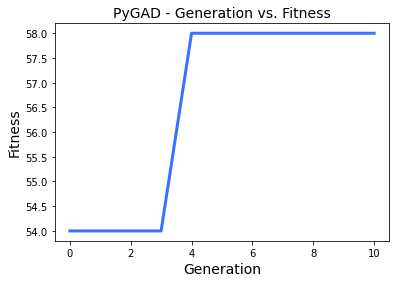

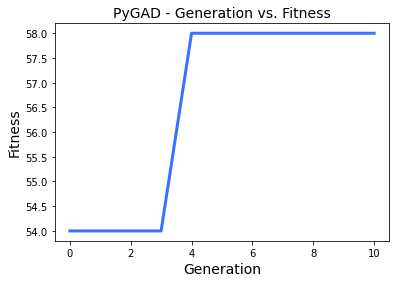

In [44]:
ga_instance.plot_fitness()

In [49]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))


Parameters of the best solution : [1 0 1 0 0 1 0 1 0]
Fitness value of the best solution = 58


In [46]:
if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

Best fitness value reached after 4 generations.
